In [137]:
# Deklarasi mengambil library python 
import pandas
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [138]:
# Menentukan variabel x dan y
df = pandas.read_excel('Listrik.xlsx')
penduduk=df['x']
X = df[['x']]
y = round(df['y'],2)

In [139]:
# Menampilkan data
df.head(11)

,tahun,x,y
0,2011,242.0,72512.649
1,2012,245.4,72133.000
2,2013,248.8,77211.000
3,2014,252.2,84086.000
4,2015,255.5,88682.000
5,2016,258.7,93635.000
6,2017,264.5,94457.000
7,2018,267.1,97927.000
8,2019,269.6,103833.000
9,2020,270.2,112754.000


In [140]:
# Proses linear regression dalam menentukan persamaan model
regression = linear_model.LinearRegression()
model = regression.fit(X.values,y)
a = regression.intercept_
b = regression.coef_[0]

print('Persamaan Linear dari Konsumsi Listrik adalah y = ',round(a,3),' + ',
      round(b,3),'.X1 ')

Persamaan Linear dari Konsumsi Listrik adalah y =  -254239.231  +  1337.921 .X1 


### Menentukan Standar Error

In [141]:
y_pred = regression.predict(X.values)

r2 = r2_score(y, y_pred)
print('Nilai R2 Model Persamaan Konsumsi  : ' ,r2)

Nilai R2 Model Persamaan Konsumsi  :  0.9416211851998079


In [142]:
# Melakukan prediksi terhadap data aktual 
df['y_prediksi'] = round(a + (b * X['x']),2)

In [143]:
# Menampilkan hasil prediksi data aktual dalam sebuah tabel
nilai_x = X['x']
result = pandas.DataFrame({'x ': nilai_x, 'y ':y, 'Prediksi ': round(df['y_prediksi'],2)})

print(result)

       x          y   Prediksi 
0   242.0   72512.65   69537.67
1   245.4   72133.00   74086.61
2   248.8   77211.00   78635.54
3   252.2   84086.00   83184.47
4   255.5   88682.00   87599.61
5   258.7   93635.00   91880.96
6   264.5   94457.00   99640.90
7   267.1   97927.00  103119.49
8   269.6  103833.00  106464.30
9   270.2  112754.00  107267.05
10  272.6  114664.00  110478.06


In [144]:
# Proses menghitung nilai absolut dan standar error
df['Nilai_error'] =np.abs(df['y'] - df['y_prediksi']) 
df['Error^2'] = round(df['Nilai_error']*df['Nilai_error'],3)
print(df)

    tahun      x           y  y_prediksi  Nilai_error       Error^2
0    2011  242.0   72512.649    69537.67     2974.979  8.850500e+06
1    2012  245.4   72133.000    74086.61     1953.610  3.816592e+06
2    2013  248.8   77211.000    78635.54     1424.540  2.029314e+06
3    2014  252.2   84086.000    83184.47      901.530  8.127563e+05
4    2015  255.5   88682.000    87599.61     1082.390  1.171568e+06
5    2016  258.7   93635.000    91880.96     1754.040  3.076656e+06
6    2017  264.5   94457.000    99640.90     5183.900  2.687282e+07
7    2018  267.1   97927.000   103119.49     5192.490  2.696195e+07
8    2019  269.6  103833.000   106464.30     2631.300  6.923740e+06
9    2020  270.2  112754.000   107267.05     5486.950  3.010662e+07
10   2021  272.6  114664.000   110478.06     4185.940  1.752209e+07


In [145]:
df['std_error'] = df['Nilai_error']*df['Nilai_error']

total = np.sum(df['std_error'])
jumlah_data = len(df['std_error'])
standar_deviasi = np.std(df['std_error'], ddof=1)
hasil = np.sqrt(total / (jumlah_data - 2))
print(hasil)


3773.365906145349


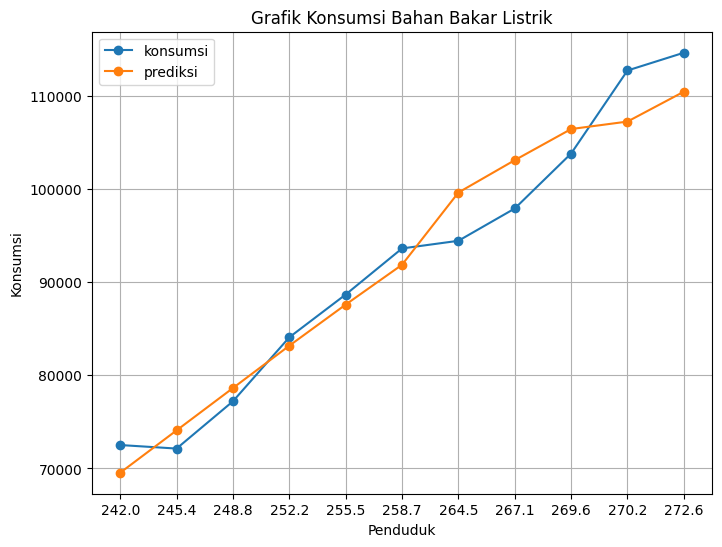

In [146]:
# Menampilkan Grafik Konsumsi dan Prediksi
plt.figure(figsize=(8, 6))
plt.plot(y, marker='o', linestyle='-', label='konsumsi')
plt.plot(df['y_prediksi'], marker='o', linestyle='-', label='prediksi')
plt.title('Grafik Konsumsi Bahan Bakar Listrik')
plt.xlabel('Penduduk')
plt.ylabel('Konsumsi')
plt.grid(True)
plt.xticks(range(len(penduduk)), penduduk)
plt.legend()
plt.show()

### Penggunaan Eksponensial

In [147]:
# Deklarasi mengambil library python
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [148]:
# Menentukan variabel x dan y
df = pd.read_excel('Listrik.xlsx')
penduduk=df['x']
tahun = df['tahun']
X = df[['x']]
y = round(df['y'],2)

In [149]:
# Menghitung eksponensial
def eksponensial(t, A, r):
    return A * np.exp(r * (t - tahun[0]))

In [150]:
# Penggunaan fungsi eksponensial
params, covariance = curve_fit(eksponensial, tahun, penduduk, p0=[penduduk[0], 0.01])
A, r = params

In [151]:
# Menghitung prediksi
tahun_prediksi = np.arange(2022, 2031)
penduduk_prediksi = eksponensial(tahun_prediksi, A, r)
test= pd.DataFrame({'Tahun' : tahun_prediksi,'Hasil Prediksi' : penduduk_prediksi})
print(test)

   Tahun  Hasil Prediksi
0   2022      278.510646
1   2023      281.977847
2   2024      285.488210
3   2025      289.042275
4   2026      292.640584
5   2027      296.283689
6   2028      299.972147
7   2029      303.706523
8   2030      307.487388


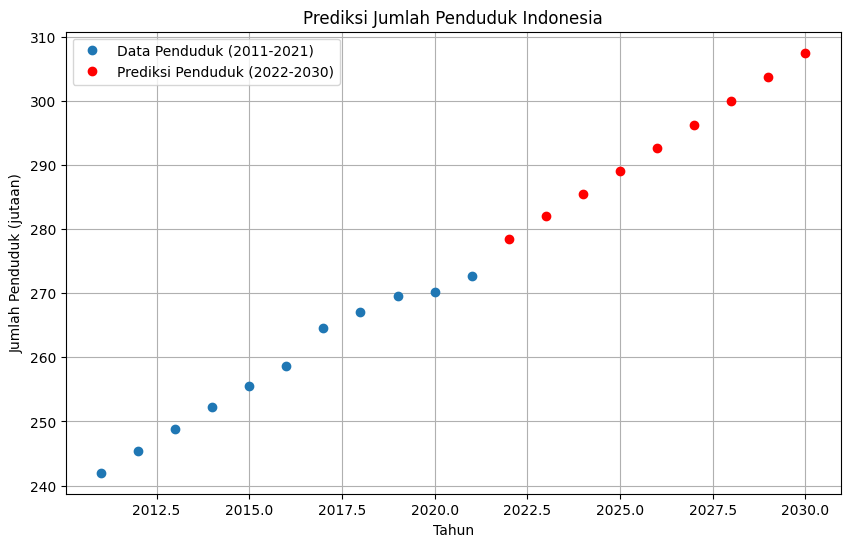

In [152]:
# Proses menampilkan grafik prediksi
plt.figure(figsize=(10, 6))
plt.plot(tahun, penduduk, 'o', label='Data Penduduk (2011-2021)')
plt.plot(tahun_prediksi, penduduk_prediksi, 'o', color='red', label='Prediksi Penduduk (2022-2030)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk (jutaan)')
plt.title('Prediksi Jumlah Penduduk Indonesia')
plt.legend()
plt.grid(True)
plt.show()

### Prediksi Konsumsi Berdasarkan Jumlah Penduduk Tahun 2022 - 2030

In [153]:
hasil_prediksi_konsumsi = []
for i in penduduk_prediksi: 
    konsumsi = a + (b*i)
    hasil_prediksi_konsumsi.append([i, round(konsumsi, 2)])

In [154]:
tahun_prediksi = np.arange(2022, 2031)

print("Tahun | Penduduk | Konsumsi Prediksi")
print("----------------------------")
for i in range(len(hasil_prediksi_konsumsi)):
    tahun = tahun_prediksi[i]
    penduduk = hasil_prediksi_konsumsi[i][0] 
    konsumsi = hasil_prediksi_konsumsi[i][1] 
    print(f"{tahun}  |  {round(penduduk, 2)}  |  {round(konsumsi, 2)}")

Tahun | Penduduk | Konsumsi Prediksi
----------------------------
2022  |  278.51  |  118386.04
2023  |  281.98  |  123024.88
2024  |  285.49  |  127721.47
2025  |  289.04  |  132476.53
2026  |  292.64  |  137290.78
2027  |  296.28  |  142164.97
2028  |  299.97  |  147099.83
2029  |  303.71  |  152096.13
2030  |  307.49  |  157154.63


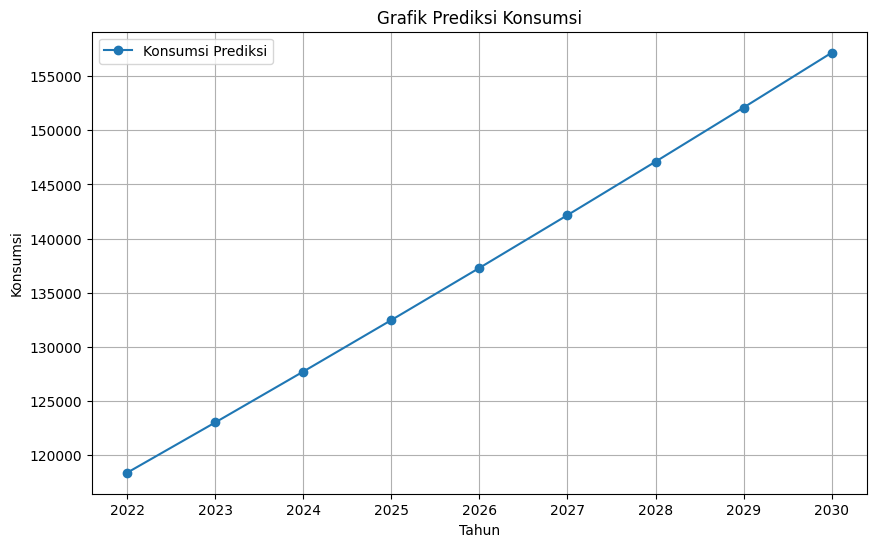

In [155]:
# Prediksi konsumsi bahan bakar 2022-2030
konsumsi = [data[1] for data in hasil_prediksi_konsumsi]

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(tahun_prediksi, konsumsi, marker='o', label='Konsumsi Prediksi')
plt.title('Grafik Prediksi Konsumsi')
plt.xlabel('Tahun')
plt.ylabel('Konsumsi')
plt.grid(True)
plt.legend()
plt.show()